<a href="https://colab.research.google.com/github/Lekler/IBMEC/blob/main/Business%20Labs/1%C2%BA_Prova_(AP1)_Business_Labs%20-%20Resolu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1º Prova (AP1) Business Labs**

*17/04/2023*

*Alexandre R. Cordeiro - 202202041238 (Ciências Economicas)*

Instalando as bibiotecas que eu talvez precise.

In [ ]:
!pip install pandas numpy numpy-financial matplotlib matplotlib-venn scikit-learn tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importando as Bibliotecas**

In [ ]:
import numpy as np
from scipy.optimize import brentq
from pandas import Series, DataFrame
import numpy_financial as npf
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data 
import yfinance as yf
import math
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
from scipy import optimize

# Questão 1

In [ ]:
anos = np.array([0, 1, 2, 3])
fluxos = np.array([-5000, 2100, 2000, 1750])
residuais = np.array([5000, 3100, 2000, 0])

custo_capital = 0.1

**1- a)**

In [ ]:
vpl_tres_anos = npf.npv(custo_capital, fluxos) + npf.npv(custo_capital, residuais)
print("O VPL do projeto operado por três anos é de R$ {:.2f}".format(vpl_tres_anos))


O VPL do projeto operado por três anos é de R$ 9347.86


**1- b)**

In [ ]:
fluxos_ate_ano_2 = fluxos[:3]
residuais_ate_ano_2 = np.array([5000, 3100, 0])
vpl_ate_ano_2 = npf.npv(custo_capital, fluxos_ate_ano_2) + npf.npv(custo_capital, residuais_ate_ano_2)
print("O VPL do projeto se for concluído no final do Ano 2 é de R$ {:.2f}".format(vpl_ate_ano_2))

O VPL do projeto se for concluído no final do Ano 2 é de R$ 6380.17


**1 - c)**

In [ ]:
fluxos_ate_ano_1 = fluxos[:2]
residuais_ate_ano_1 = np.array([5000, 0])
vpl_ate_ano_1 = npf.npv(custo_capital, fluxos_ate_ano_1) + npf.npv(custo_capital, residuais_ate_ano_1)
print("O VPL do projeto se for concluído no final do Ano 1 é de R$ {:.2f}".format(vpl_ate_ano_1))

O VPL do projeto se for concluído no final do Ano 1 é de R$ 1909.09


**1 - d)**

In [ ]:
vpls = []
for i in range(1, len(anos)+1):
    fluxos_ate_ano = fluxos[:i]
    residuais_ate_ano = residuais[:i]
    vpl = npf.npv(custo_capital, fluxos_ate_ano) + npf.npv(custo_capital, residuais_ate_ano)
    vpls.append(vpl)


vida_otima = np.argmax(vpls) + 1
vpl_otimo = vpls[vida_otima-1]
print("A vida econômica ótima do projeto é de {} anos, com um VPL de R$ {:.2f}".format(vida_otima, vpl_otimo))

A vida econômica ótima do projeto é de 4 anos, com um VPL de R$ 9347.86


# Questão 2

In [ ]:
# Fluxos de caixa do projeto A
fa = Series([-1000, 100, 600, 800])

# Fluxos de caixa do projeto B
fb = Series([-1000, 700, 500, 200])

**2-a)**

VPL Projeto A: R$187.83
VPL Projeto B: R$199.85
TIR Projeto A: 18.13%
TIR Projeto B: 23.56%
MTIR Projeto A: 16.50%
MTIR Projeto B: 16.89%


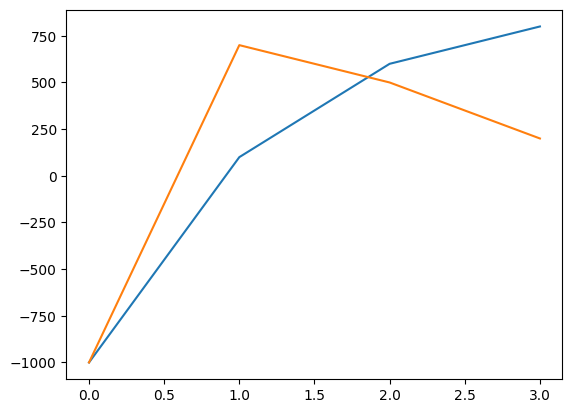

In [ ]:
# Fluxos de caixa esperados dos projetos
fc_proj_a = [-1000, 100, 600, 800]
fc_proj_b = [-1000, 700, 500, 200]

# Custo de capital
r = 0.1 # 10%

# VPL dos projetos
vpl_a = npf.npv(r, fc_proj_a)
vpl_b = npf.npv(r, fc_proj_b)

print(f"VPL Projeto A: R${vpl_a:,.2f}")
print(f"VPL Projeto B: R${vpl_b:,.2f}")

# TIR dos projetos
tir_a = npf.irr(fc_proj_a)
tir_b = npf.irr(fc_proj_b)

print(f"TIR Projeto A: {tir_a*100:.2f}%")
print(f"TIR Projeto B: {tir_b*100:.2f}%")

# Taxa de desconto
r = 0.1

# MTIR dos projetos
mtir_a = npf.mirr(fc_proj_a, r, r)
mtir_b = npf.mirr(fc_proj_b, r, r)

print(f"MTIR Projeto A: {mtir_a*100:.2f}%")
print(f"MTIR Projeto B: {mtir_b*100:.2f}%")

# Gráfico dos fluxos de caixa dos projetos
plt.plot([0, 1, 2, 3], fc_proj_a, label="Projeto A")
plt.plot([0, 1, 2, 3], fc_proj_b, label="Projeto B")


**2- b)**

In [ ]:
# Taxa de desconto
r = 0.05

# Fluxos de caixa dos projetos
fc_proj_a = np.array([-1000, 100, 600, 800])
fc_proj_b = np.array([-1000, 700, 500, 200])

# VPL dos projetos
vpl_a = npf.npv(r, fc_proj_a)
vpl_b = npf.npv(r, fc_proj_b)

# TIR dos projetos
tir_a = npf.irr(fc_proj_a)
tir_b = npf.irr(fc_proj_b)

# MTIR dos projetos
mtir_a = npf.mirr(fc_proj_a, r, r)
mtir_b = npf.mirr(fc_proj_b, r, r)

# Comparando os indicadores para tomar a decisão
print("Indicadores do Projeto A:")
print(f"VPL: R$ {round(vpl_a, 2)}")
print(f"TIR: {round(tir_a * 100, 2)}%")
print(f"MTIR: {round(mtir_a * 100, 2)}%")

print("\nIndicadores do Projeto B:")
print(f"VPL: R$ {round(vpl_b, 2)}")
print(f"TIR: {round(tir_b * 100, 2)}%")
print(f"MTIR: {round(mtir_b * 100, 2)}%")

# Decisão
if vpl_a > vpl_b:
    print("\nA empresa deve escolher o projeto A")
else:
    print("\nA empresa deve escolher o projeto B")



Indicadores do Projeto A:
VPL: R$ 330.53
TIR: 18.13%
MTIR: 15.49%

Indicadores do Projeto B:
VPL: R$ 292.95
TIR: 23.56%
MTIR: 14.39%

A empresa deve escolher o projeto A


**2- c)**

In [ ]:
# Taxa de desconto
r = 0.15

# Fluxos de caixa dos projetos
fc_proj_a = np.array([-1000, 100, 600, 800])
fc_proj_b = np.array([-1000, 700, 500, 200])

# VPL dos projetos
vpl_a = npf.npv(r, fc_proj_a)
vpl_b = npf.npv(r, fc_proj_b)

# TIR dos projetos
tir_a = npf.irr(fc_proj_a)
tir_b = npf.irr(fc_proj_b)

# MTIR dos projetos
mtir_a = npf.mirr(fc_proj_a, r, r)
mtir_b = npf.mirr(fc_proj_b, r, r)

# Comparando os indicadores para tomar a decisão
print("Indicadores do Projeto A:")
print(f"VPL: R$ {round(vpl_a, 2)}")
print(f"TIR: {round(tir_a * 100, 2)}%")
print(f"MTIR: {round(mtir_a * 100, 2)}%")

print("\nIndicadores do Projeto B:")
print(f"VPL: R$ {round(vpl_b, 2)}")
print(f"TIR: {round(tir_b * 100, 2)}%")
print(f"MTIR: {round(mtir_b * 100, 2)}%")

# Decisão
if vpl_a > vpl_b:
    print("\nA empresa deve escolher o projeto A")
else:
    print("\nA empresa deve escolher o projeto B")

Indicadores do Projeto A:
VPL: R$ 66.66
TIR: 18.13%
MTIR: 17.5%

Indicadores do Projeto B:
VPL: R$ 118.27
TIR: 23.56%
MTIR: 19.37%

A empresa deve escolher o projeto B


**2- d)**

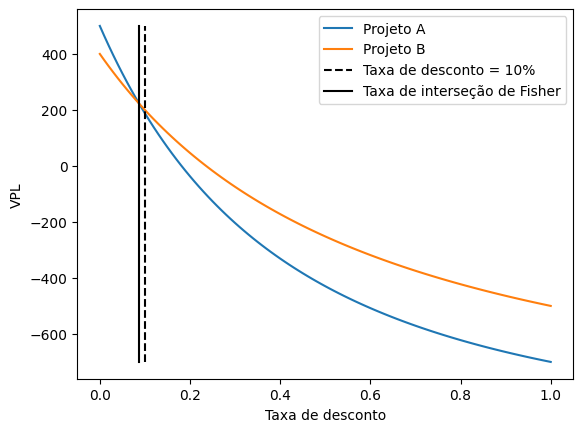

In [ ]:
# Fluxos de caixa dos projetos
fc_proj_a = np.array([-1000, 100, 600, 800])
fc_proj_b = np.array([-1000, 700, 500, 200])

# Taxa de desconto
r = 0.1

# VPL dos projetos para a taxa de desconto r
vpl_a = npf.npv(r, fc_proj_a)
vpl_b = npf.npv(r, fc_proj_b)

# Função para calcular o VPL dado uma taxa de desconto
def vpl(taxa, fluxos):
    return npf.npv(taxa, fluxos)

# Encontrar a taxa de interseção de Fisher
taxa_intersecao = brentq(lambda x: vpl(x, fc_proj_a) - vpl(x, fc_proj_b), 0.0, 1.0)

# VPLs dos projetos para a taxa de interseção de Fisher
vpl_a_intersecao = npf.npv(taxa_intersecao, fc_proj_a)
vpl_b_intersecao = npf.npv(taxa_intersecao, fc_proj_b)

# Plotar o gráfico dos VPLs para as taxas de desconto r e taxa_intersecao
taxas = np.linspace(0, 1, 101)
vpls_a = [vpl(taxa, fc_proj_a) for taxa in taxas]
vpls_b = [vpl(taxa, fc_proj_b) for taxa in taxas]

plt.plot(taxas, vpls_a, label='Projeto A')
plt.plot(taxas, vpls_b, label='Projeto B')
plt.plot([r, r], [min(vpls_a + vpls_b), max(vpls_a + vpls_b)], 'k--', label='Taxa de desconto = 10%')
plt.plot([taxa_intersecao, taxa_intersecao], [min(vpls_a + vpls_b), max(vpls_a + vpls_b)], 'k-', label='Taxa de interseção de Fisher')
plt.legend()
plt.xlabel('Taxa de desconto')
plt.ylabel('VPL')
plt.show()




A taxa de interseção de Fisher foi usada para encontrar a taxa de desconto em que os VPLs dos dois projetos se igualam. Essa taxa é o ponto de equilíbrio entre os projetos. O resultado mostrou que a taxa de interseção de Fisher é menor do que a taxa de desconto de 10%, indicando que, para essa taxa de desconto, o projeto B é mais viável do que o projeto A. A partir da taxa de interseção de Fisher, o projeto A passa a ser mais viável do que o projeto B.

**2 - e)** A causa mais provável para o conflito decisório entre os itens (b) e (c) é a diferença significativa na taxa de custo de capital (5% versus 15%). Enquanto o Projeto A apresenta um melhor desempenho sob um custo de capital menor, o Projeto B é mais vantajoso sob um custo de capital mais elevado.

A recomendação decisória mais apropriada seria realizar uma análise de sensibilidade para identificar a taxa de custo de capital em que os projetos se igualam, ou seja, a taxa de intersecção de Fisher. A partir dessa análise, a empresa poderia decidir qual projeto é mais vantajoso de acordo com a taxa de custo de capital atual ou futura. Além disso, também seria importante considerar outros fatores relevantes para a decisão, como a disponibilidade de recursos, os riscos envolvidos em cada projeto, entre outros.

# Questão 3

*Replicando tudo da aula - "Aplicação no Mercado Financeiro - Teoria do Portfólio" e mudando algumas coisas :D*

In [ ]:
acoes = ['ITUB4.SA', 'BRFS3.SA', 'MSCD34.SA', 'VALE3.SA', 'MGLU3.SA', '^BVSP']
acoes

['ITUB4.SA', 'BRFS3.SA', 'MSCD34.SA', 'VALE3.SA', 'MGLU3.SA', '^BVSP']

In [ ]:
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao] = yf.download(acao,
            start='2012-01-01', end='2023-04-15')['Close']
acoes_df.index = acoes_df.index.strftime('%Y-%m-%d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
acoes_df.reset_index(inplace=True)
acoes_df

,Date,ITUB4.SA,BRFS3.SA,MSCD34.SA,VALE3.SA,MGLU3.SA,^BVSP
0,2012-01-02,15.495298,35.549999,NaN,40.900002,0.290625,NaN
1,2012-01-03,15.882339,35.980000,NaN,42.720001,0.288750,59265.0
2,2012-01-04,15.900553,36.270000,NaN,43.009998,0.285937,59365.0
3,2012-01-05,15.782164,36.480000,NaN,41.860001,0.283437,58546.0
4,2012-01-06,15.900553,36.590000,NaN,41.500000,0.291250,58600.0
...,...,...,...,...,...,...,...
2796,2023-04-10,24.670000,6.170000,58.939999,78.230003,3.350000,101847.0
2797,2023-04-11,25.469999,6.760000,58.700001,82.360001,3.780000,106214.0
2798,2023-04-12,25.639999,6.810000,57.450001,80.599998,3.880000,106890.0
2799,2023-04-13,25.639999,6.290000,58.650002,79.510002,3.860000,106458.0


**3-a)**

In [ ]:
acoes = acoes_df.copy()
#acoes.drop(labels = ['^BVSP'], axis=1, inplace=True)
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes.columns[1:]:
  figura.add_scatter(x = acoes["Date"] ,y = acoes[i], name = i)
figura.show()

Gráfico mostra a váriação dos preços da ações ao decorrer do periódo de meados "2012 até março 2023"

In [ ]:
dataset = acoes_df.copy()
dataset.drop(labels = ['Date'], axis=1, inplace=True)
taxas_retorno = np.log(dataset / dataset.shift(1))
dataset_date = acoes_df.copy()
date = dataset_date.filter(["Date"]) 
taxas_retorno = pd.concat([date, taxas_retorno], axis=1)
taxas_retorno

,Date,ITUB4.SA,BRFS3.SA,MSCD34.SA,VALE3.SA,MGLU3.SA,^BVSP
0,2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-03,0.024671,0.012023,NaN,0.043537,-0.006473,NaN
2,2012-01-04,0.001146,0.008028,NaN,0.006765,-0.009790,0.001686
3,2012-01-05,-0.007473,0.005773,NaN,-0.027102,-0.008782,-0.013892
4,2012-01-06,0.007473,0.003011,NaN,-0.008637,0.027192,0.000922
...,...,...,...,...,...,...,...
2796,2023-04-10,0.010595,0.004874,0.000170,0.019100,-0.005952,0.010115
2797,2023-04-11,0.031913,0.091324,-0.004080,0.051447,0.120764,0.041984
2798,2023-04-12,0.006652,0.007369,-0.021525,-0.021601,0.026111,0.006344
2799,2023-04-13,0.000000,-0.079431,0.020673,-0.013616,-0.005168,-0.004050


In [ ]:
taxas_retorno.describe()

,ITUB4.SA,BRFS3.SA,MSCD34.SA,VALE3.SA,MGLU3.SA,^BVSP
count,2800.000000,2800.000000,2778.000000,2800.000000,2800.000000,2783.000000
mean,0.000185,-0.000625,0.001207,0.000234,0.000912,0.000187
std,0.020373,0.025168,0.018219,0.027208,0.039050,0.015710
min,-0.198015,-0.219987,-0.109946,-0.281822,-0.236698,-0.159930
25%,-0.011410,-0.012036,-0.001525,-0.014471,-0.019283,-0.008231
50%,0.000000,-0.000678,0.000000,0.000000,0.000000,0.000273
75%,0.011273,0.011357,0.004869,0.014149,0.019682,0.008998
max,0.111276,0.150814,0.234040,0.193574,0.316924,0.130223


In [ ]:
import warnings
warnings.filterwarnings("ignore")
taxas_retorno.mean()*100

ITUB4.SA     0.018498
BRFS3.SA    -0.062544
MSCD34.SA    0.120658
VALE3.SA     0.023425
MGLU3.SA     0.091243
^BVSP        0.018692
dtype: float64

In [ ]:
dataset = taxas_retorno.copy()
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset.std()*100

ITUB4.SA     2.037250
BRFS3.SA     2.516850
MSCD34.SA    1.821924
VALE3.SA     2.720753
MGLU3.SA     3.904957
^BVSP        1.571001
dtype: float64

**3-B)**

In [ ]:
figura = px.line(title = 'Histórico de retorno das ações')
for i in taxas_retorno.columns[1:]:
  figura.add_scatter(x = taxas_retorno["Date"] ,y = taxas_retorno[i], name = i)
figura.show()

Grafíco mostra qual ação teve maior retorno em compação com as demais.

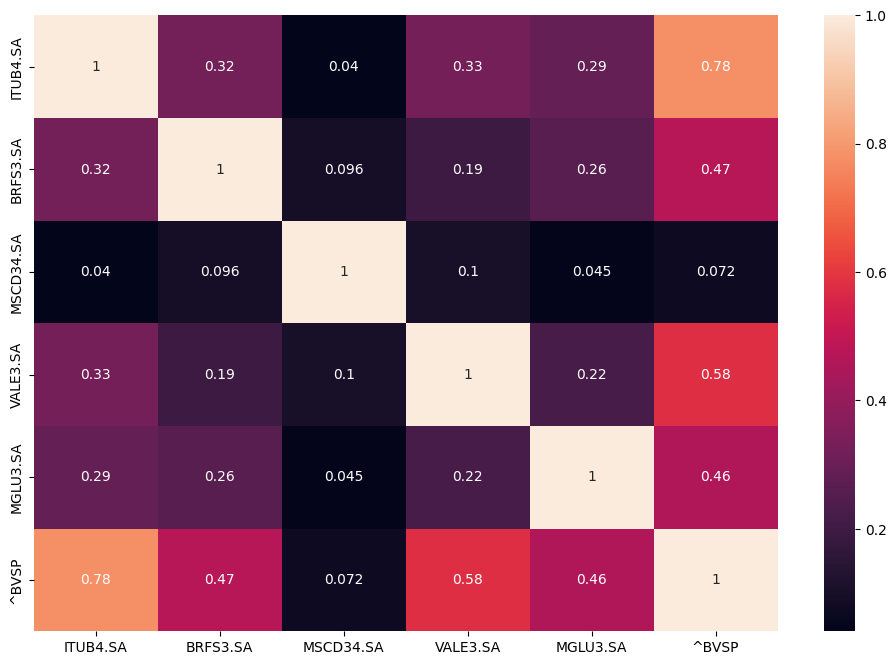

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

**3-c)**

In [ ]:
acoes_port = acoes_df.copy()
acoes_port.drop(labels = ['^BVSP'], axis=1, inplace=True)
log_ret = acoes_port.copy()
log_ret.drop(labels = ["Date"], axis = 1, inplace = True)
log_ret = np.log(log_ret/log_ret.shift(1))
np.random.seed(42)
num_ports = 10000
all_weights = np.zeros((num_ports, len(acoes_port.columns[1:])))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum((log_ret.mean() * weights))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [ ]:
print("Max Sharpe Ratio: {}". format(sharpe_arr.max()))
print("Local do Max Sharpe Ratio: {}". format(sharpe_arr.argmax()))

Max Sharpe Ratio: 0.06531497000716449
Local do Max Sharpe Ratio: 7339


In [ ]:
# Pesos do Portfólio do Max Sharpe Ratio
print(all_weights[7339,:])

[0.10241837 0.03561681 0.70264793 0.06301155 0.09630534]


In [ ]:
# salvando os dados do Max Sharpe Ratio
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
print(max_sr_ret*100)
print(max_sr_vol*100)

0.09541366684117951
1.4608238636672948


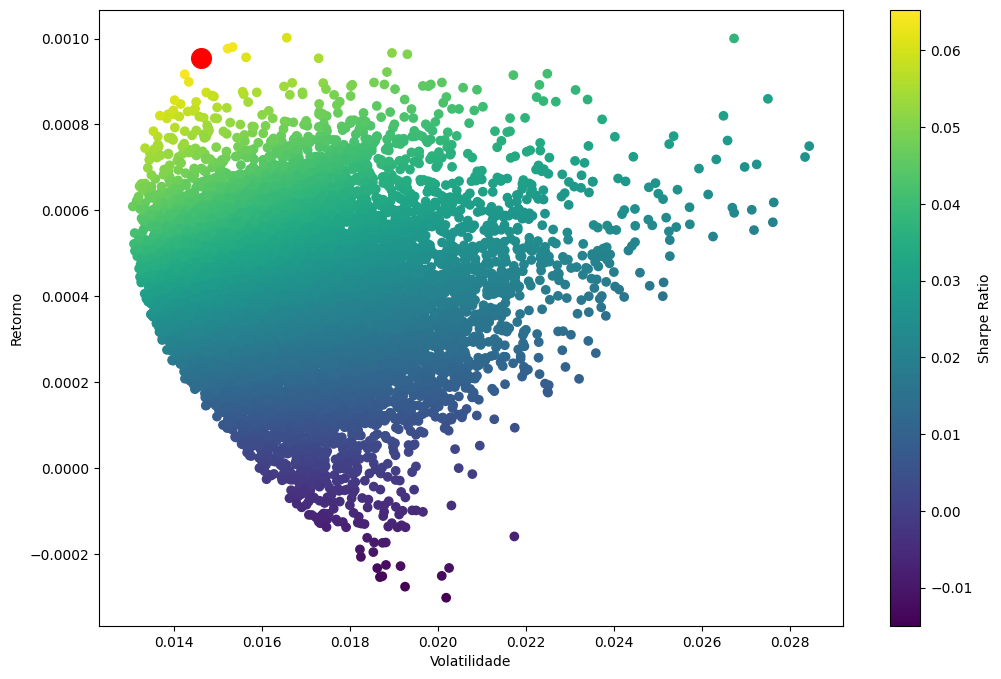

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=200) # black dot
plt.show()

**3-D)**

In [ ]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [ ]:
cons = ({'type': 'eq', 'fun': check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1))
init_guess = ((0.2),(0.2),(0.2),(0.2),(0.2))

In [ ]:
op_results = optimize.minimize(neg_sharpe, init_guess, method="SLSQP", bounds= bounds, constraints=cons)
print(op_results)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.06976294679421949
       x: [ 0.000e+00  1.021e-16  8.717e-01  0.000e+00  1.283e-01]
     nit: 8
     jac: [ 1.832e-03  5.227e-02 -1.213e-04  3.113e-03  8.136e-04]
    nfev: 49
    njev: 8


In [ ]:
frontier_y = np.linspace(0.000, 0.00082, 250)

In [ ]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [ ]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = optimize.minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

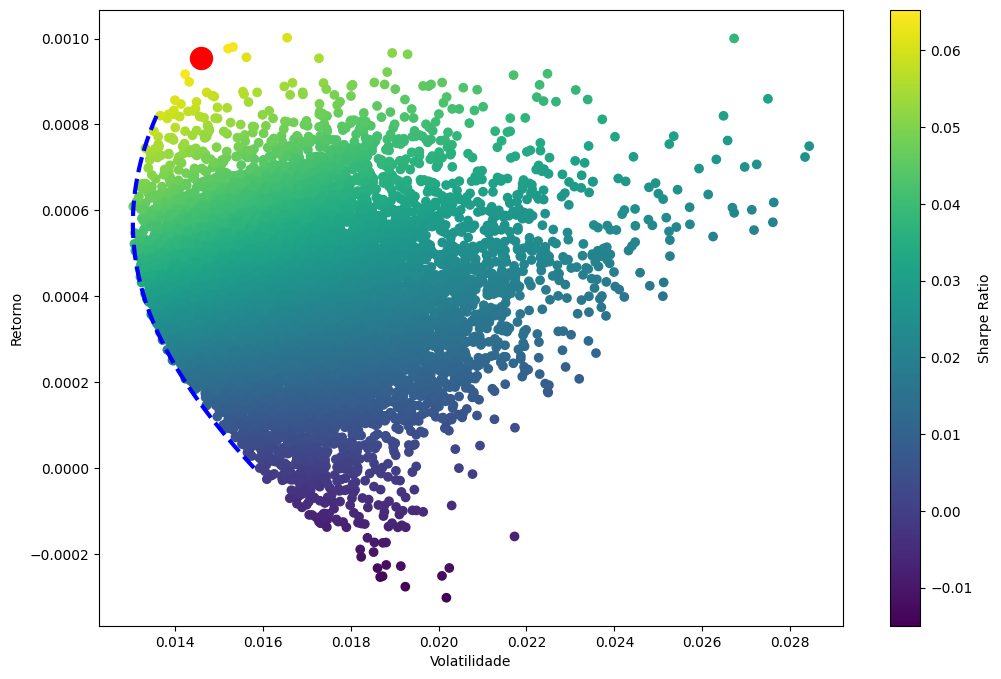

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.plot(frontier_x,frontier_y, 'b--', linewidth=3)
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=250)
# plt.savefig('cover.png')
plt.show()

# Questão 4

In [ ]:
acoes_port = acoes_df.copy()
acoes_port.drop(labels = ['^BVSP'], axis=1, inplace=True)
acoes_port

,Date,ITUB4.SA,BRFS3.SA,MSCD34.SA,VALE3.SA,MGLU3.SA
0,2012-01-02,15.495298,35.549999,NaN,40.900002,0.290625
1,2012-01-03,15.882339,35.980000,NaN,42.720001,0.288750
2,2012-01-04,15.900553,36.270000,NaN,43.009998,0.285937
3,2012-01-05,15.782164,36.480000,NaN,41.860001,0.283437
4,2012-01-06,15.900553,36.590000,NaN,41.500000,0.291250
...,...,...,...,...,...,...
2796,2023-04-10,24.670000,6.170000,58.939999,78.230003,3.350000
2797,2023-04-11,25.469999,6.760000,58.700001,82.360001,3.780000
2798,2023-04-12,25.639999,6.810000,57.450001,80.599998,3.880000
2799,2023-04-13,25.639999,6.290000,58.650002,79.510002,3.860000


In [ ]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:  
    pesos = np.random.random(len(dataset.columns) - 1)
    #print(pesos, pesos.sum())
    pesos = pesos / pesos.sum()
    #print(pesos, pesos.sum())

  colunas = dataset.columns[1:]
  #print(colunas)
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    #print(i, acao)
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
  
  dataset['soma valor'] = dataset.sum(axis = 1)

  datas = dataset['Date']
  #print(datas)

  dataset.drop(labels = ['Date'], axis = 1, inplace = True)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1]) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [ ]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(acoes_port, 10000, 0, 
                                                          [0.32020505, 0.62806883, 0.01391511, 0.01269245,
                                                           0.02511856])
dataset

,ITUB4.SA,BRFS3.SA,MSCD34.SA,VALE3.SA,MGLU3.SA,soma valor,taxa retorno
0,3202.050500,6280.688300,NaN,126.924500,251.185600,9860.848900,0.000000
1,3282.031023,6356.657300,NaN,132.572484,249.565036,10020.825843,1.609325
2,3285.794931,6407.892332,NaN,133.472429,247.133792,10074.293483,0.532147
3,3261.330221,6444.993283,NaN,129.903654,244.973058,10081.200216,0.068535
4,3285.794931,6464.427308,NaN,128.786468,251.725771,10130.734477,0.490150
...,...,...,...,...,...,...,...
2796,5097.971276,1090.066051,NaN,242.770261,2895.386559,9326.194148,0.498069
2797,5263.288386,1194.302539,NaN,255.586834,3267.033261,9980.211020,6.777722
2798,5298.418322,1203.136087,NaN,250.125040,3353.462836,10105.142284,1.244020
2799,5298.418322,1111.266667,NaN,246.742467,3336.176756,9992.604212,-1.119919


In [ ]:
acoes_pesos

,Ações,Pesos
0,ITUB4.SA,0.320205
1,BRFS3.SA,0.628069
2,MSCD34.SA,0.013915
3,VALE3.SA,0.012692
4,MGLU3.SA,0.025119


In [ ]:
soma_valor

9941.975446239883

In [ ]:
figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio',
                labels=dict(x="Data", y="Retorno %"))
figura.add_hline(y = dataset['taxa retorno'].mean(), line_color="red", line_dash="dot", )
figura.show()

**4-a)**

In [ ]:
figura = px.line(title = 'Evolução do patrimônio')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
  figura.add_scatter(x = datas, y = dataset[i], name = i)
figura.show()

O grafico mostra que ou a VALE3.SA é um pessimo investimento perto das demais ou eu importei os dados de forma errada; Provalvelment e 2º alternativa, até porque a MSCD34.SA não foi incorporada e a VALE3.SA na questão 3 apresentava um bom retorno.

**4-B)**

In [ ]:
figura = px.line(x = datas, y = dataset['soma valor'], 
                 title = 'Evolução do patrimônio da Carteira',
                 labels=dict(x="Data", y="Valor R$"))
figura.add_hline(y = dataset['soma valor'].mean(), 
                 line_color="green", line_dash="dot", )
figura.add_hline(y = 10000, 
                 line_color="red", line_dash="dot", )
figura.show()

O grafico mostra que eu, basicamente, voltei a estaca 0 por não ter saído na janela de oportunidade criada pela pandemia.